In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from google.colab import drive
plt.style.use("fivethirtyeight")

In [21]:
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Data Frame/Dataset-Praktikum (2).csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40




#**EDA**



In [24]:
data.shape

(200, 5)

In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
data.isnull().sum()

,0
IDPelanggan,0
Kelamin,0
Usia,0
Pendapatan (juta Rp),0
Rating_pengeluaran (1-100),0


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IDPelanggan,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Usia,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Pendapatan (juta Rp),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Rating_pengeluaran (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [28]:
data.describe(include=['object'])

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


In [29]:
data.drop(columns='IDPelanggan', inplace=True)

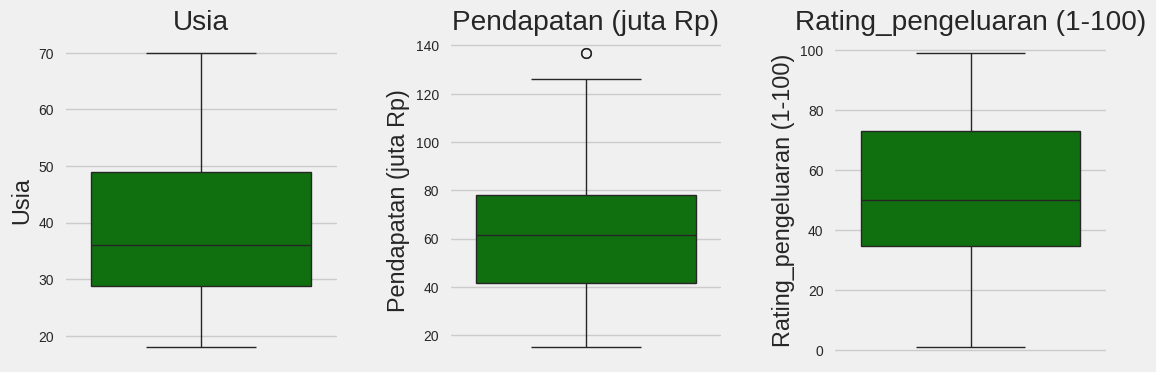

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
    # Definisikan variabel yang akan divisualisasikan
    variables = data.select_dtypes(exclude='object').columns

    # Buat figure dan axes untuk subplot dengan ukuran 1x3
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Sesuaikan ukuran figure
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="green", ax=axes[i])  # Perhatikan perubahan di sini
        axes[i].set_title(var)  # Tambahkan judul untuk setiap plot

    # Tampilkan plot
    plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

#**Pre-Processing**

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Kelamin'] = le.fit_transform(data['Kelamin'])
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [32]:
# instantiate
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

# **Modelling**

## 1. K-Means

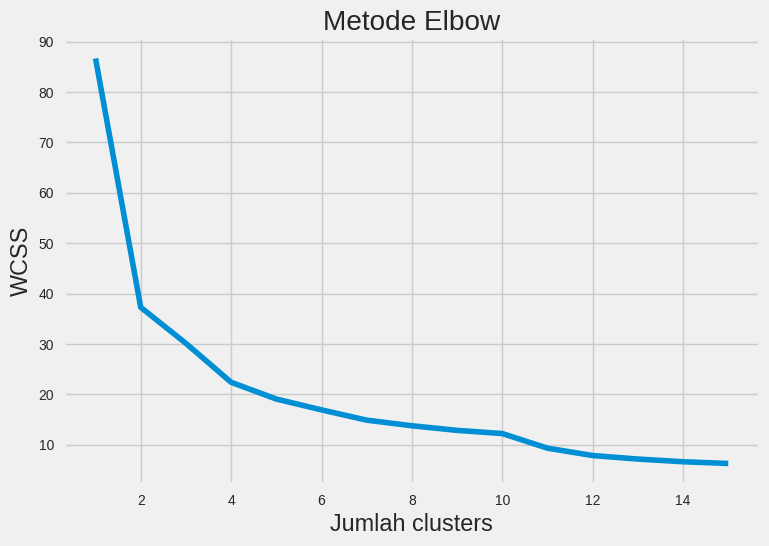

In [33]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

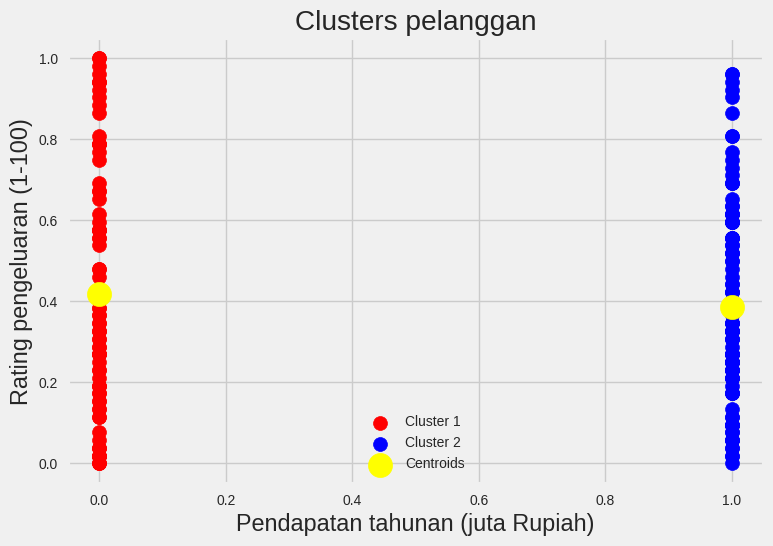

In [35]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

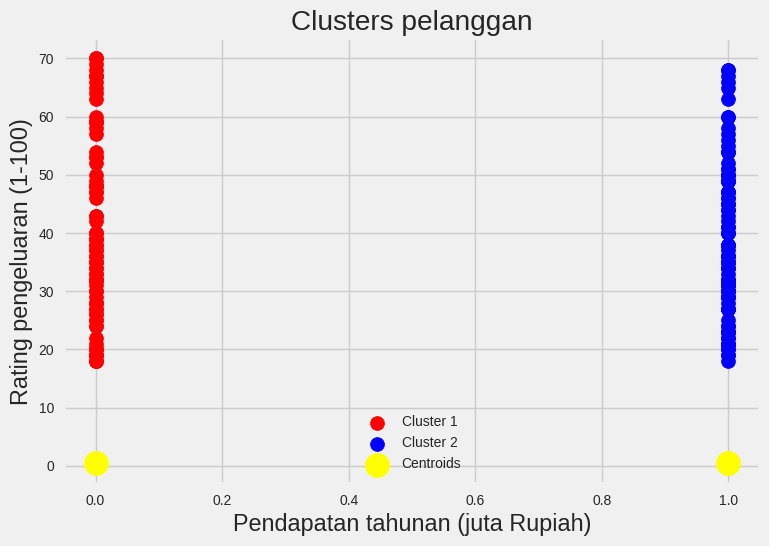

In [36]:
data['Hasil_cluster'] = model1.labels_
# Visualisasi hasil clusters
plt.scatter(data.values[y_pred1 == 0, 0], data.values[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(data.values[y_pred1 == 1, 0], data.values[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

## 2. DB-Scan

In [37]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1,min_samples=10)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [38]:
# Tambahkan label tersebut menjadi kolom baru didataset
data['Hasil_cluster'] = model2.labels_
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Hasil_cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


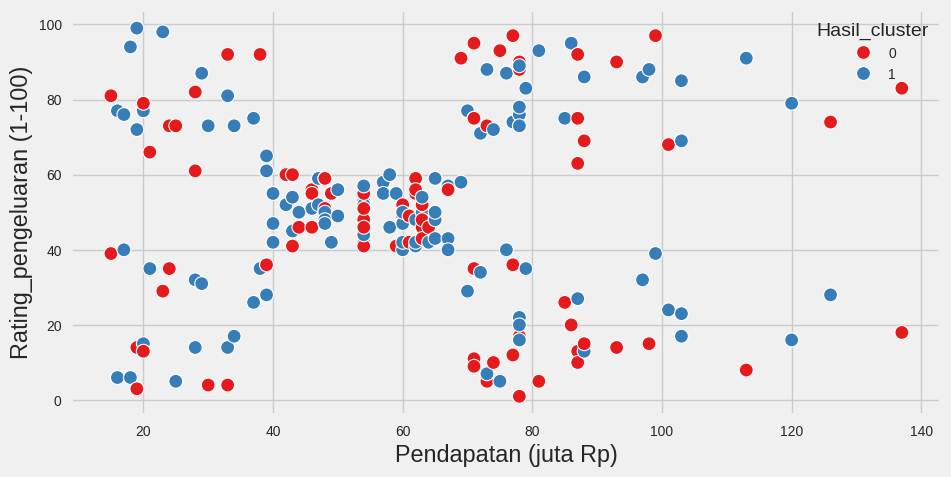

In [39]:
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'Pendapatan (juta Rp)', y = 'Rating_pengeluaran (1-100)',
                hue = 'Hasil_cluster', data = data, palette = 'Set1', s=100);

# **Matriks** **Evaluasi**

## Silhouette_score

In [40]:
# Menghitung Silhouette_score algoritma k-means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("Silhouette Score:", Evaluasi_KMeans)

Silhouette Score: 0.5194624832665107


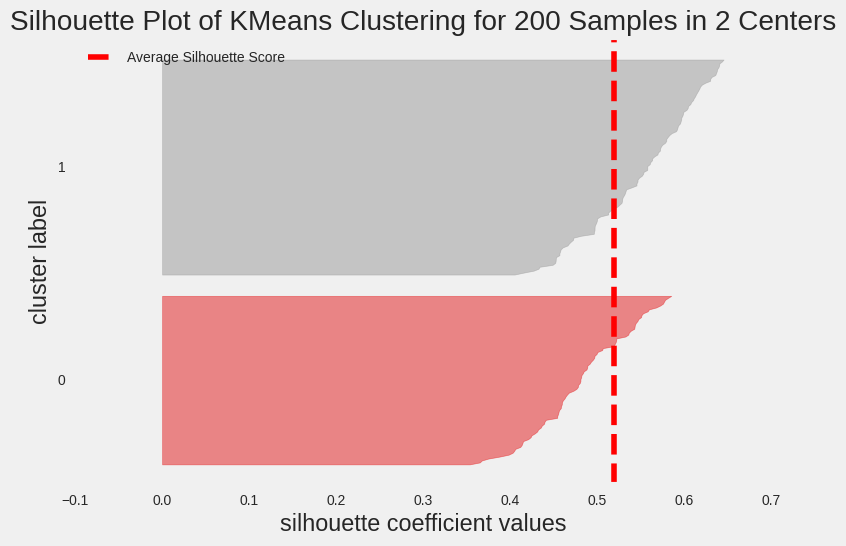

In [41]:
# Membuat silhouette vizualitation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [42]:
# Menghitung Silhouette_score algoritma db-scan
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
print("Silhouette Score:", Evaluasi_DBScan)

Silhouette Score: 0.5194624832665107


## Davies-Bouldin Index (DBI)

In [43]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.8172534497318451


In [44]:
# Menghitung Davies-Bouldin Index (DBI) algoritma db-scan
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 0.8172534497318451


In [47]:
# Evaluasi Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, y_pred1)
silhouette_dbscan = silhouette_score(X_scaled, y_pred2)

# Evaluasi Davies-Bouldin Index (DBI)
dbi_kmeans = davies_bouldin_score(X_scaled, y_pred1)
dbi_dbscan = davies_bouldin_score(X_scaled, y_pred2)

# Tampilkan hasil evaluasi
print("K-Means: Silhouette Score =", silhouette_kmeans, "| DBI =", dbi_kmeans)
print("DBSCAN: Silhouette Score =", silhouette_dbscan, "| DBI =", dbi_dbscan)

# Pilih model terbaik berdasarkan evaluasi
best_model = "K-Means" if silhouette_kmeans > silhouette_dbscan and dbi_kmeans < dbi_dbscan else "DBSCAN"
print("Model terbaik berdasarkan evaluasi adalah:", best_model)


K-Means: Silhouette Score = 0.5194624832665107 | DBI = 0.8172534497318451
DBSCAN: Silhouette Score = 0.5194624832665107 | DBI = 0.8172534497318451
Model terbaik berdasarkan evaluasi adalah: DBSCAN
